In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [5]:
df = pd.concat([df2000, df2001],
              ignore_index=True)

display(df.head(2), df.tail(2))

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2601,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN
2602,tt9212730,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,382630.0,ja,実録外伝 ゾンビ極道,...,0.0,88.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Yakuza Zombie,0.0,0.0,0.0,NaN


In [12]:
some_fin_df = df[(df['budget'] > 0) | (df['revenue'] > 0)]

In [13]:
len(some_fin_df)

647

- **There are 647 movies that have some financial information about either budget or revenue.**

In [7]:
fin_df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

display(fin_df.head(2), fin_df.tail(2))

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.109,2331.0,PG
12,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2528,tt0445841,0.0,/lO3XAxV38SC7ZuuNVdy6E6nOZac.jpg,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,zh,一個爛賭的傳說,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.8,3.0,NaN
2546,tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.6,15.0,NaN


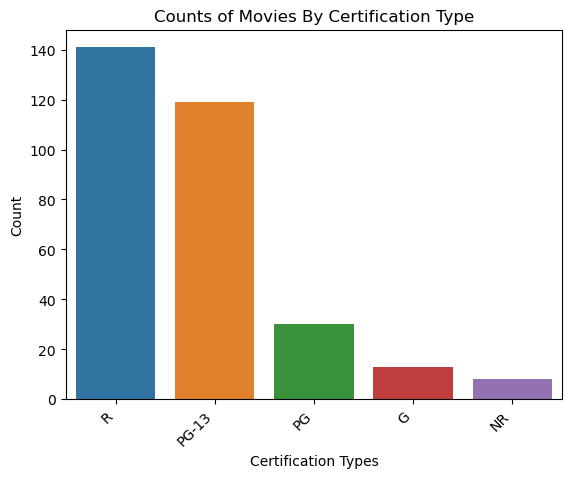

In [14]:
fin_counts = fin_df['certification'].value_counts()

ax = sns.countplot(data=fin_df, x='certification', order=fin_counts.index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xlabel='Certification Types', ylabel='Count',
       title='Counts of Movies By Certification Type');

In [19]:
# Credit to the Coding Dojo

def viz_categorical_vs_target(df, x, y, figsize=(6,4), fillna = True,
                              placeholder = 'MISSING', order = None,
                              target_type='reg'):
  viz_df = df.copy()

  if fillna == True:
    viz_df[x] = viz_df[x].fillna(placeholder)
  else:
    viz_df = viz_df.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)

  if target_type=='reg':
    sns.barplot(data=viz_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    sns.stripplot(data=viz_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  elif target_type == 'class':
    ax = sns.histplot(data=viz_df, hue=y, x=x, stat='percent', multiple='fill')

  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()

  return fig, ax

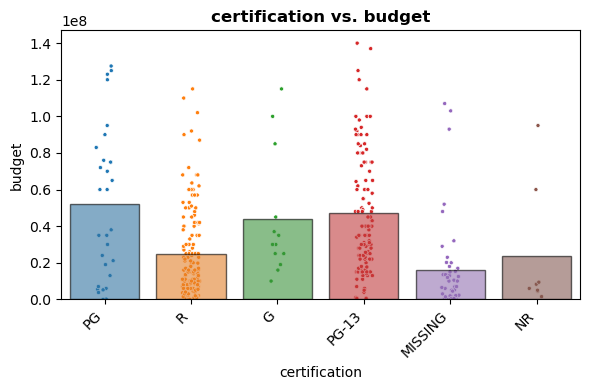

In [22]:
viz_categorical_vs_target(fin_df, x='certification', y='budget');

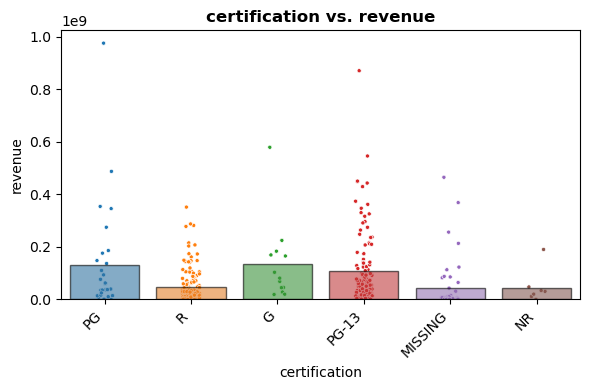

In [23]:
viz_categorical_vs_target(fin_df, x='certification', y='revenue');